In [5]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files

The data for this exercise is available at: https://www.kaggle.com/datamunge/sign-language-mnist/home

Sign up and download to find 2 CSV files: sign_mnist_test.csv and sign_mnist_train.csv -- You will upload both of them using this button before you can continue.


In [0]:
uploaded=files.upload()

In [10]:
def get_data(filename):
  # You will need to write code that will read the file passed
  # into this function. The first line contains the column headers
  # so you should ignore it
  # Each successive line contians 785 comma separated values between 0 and 255
  # The first value is the label
  # The rest are the pixel values for that picture
  # The function will return 2 np.array types. One with all the labels
  # One with all the images
  #
  # Tips: 
  # If you read a full line (as 'row') then row[0] has the label
  # and row[1:785] has the 784 pixel values
  # Take a look at np.array_split to turn the 784 pixels into 28x28
  # You are reading in strings, but need the values to be floats
  # Check out np.array().astype for a conversion
  with open(filename) as training_file:
    reader = list(csv.reader(training_file, delimiter=',', quotechar='|'))
    # Your code starts here
    images, labels = [], []
    for i in range(1, len(reader)):
      labels.append(reader[i][0])
      images.append(np.array_split(reader[i][1:], 28))
    # Your code ends here
    return np.array(images), np.array(labels)


training_images, training_labels = get_data('sign_mnist_train.csv')
testing_images, testing_labels = get_data('sign_mnist_test.csv')

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

# Their output should be:
# (27455, 28, 28)
# (27455,)
# (7172, 28, 28)
# (7172,)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [11]:
# In this section you will have to add another dimension to the data
# So, for example, if your array is (10000, 28, 28)
# You will need to make it (10000, 28, 28, 1)
# Hint: np.expand_dims

training_images = np.expand_dims(training_images, axis=4)# Your Code Here
testing_images = np.expand_dims(testing_images, axis=4)# Your Code Here

# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(rescale=1./255., # Your Code Here
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1./255.) # Your Code Here
    
# Keep These
print(training_images.shape)
print(testing_images.shape)
    
# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


D:\Anaconda3\envs\python36\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  
D:\Anaconda3\envs\python36\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  import sys


In [17]:
# Define the model
# Use no more than 2 Conv2D and 2 MaxPooling2D
model = tf.keras.models.Sequential([
    # Your Code Here
    tf.keras.layers.Conv2D(32, (3,3), input_shape=(28, 28, 1), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')
])

# Compile Model. 
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=tf.keras.optimizers.RMSprop(lr=0.001), 
              metrics=['acc'])

# Train the Model
history = model.fit_generator(train_datagen.flow(training_images, training_labels, batch_size=32),
                              steps_per_epoch=len(training_images) / 32,
                              epochs=15,
                              validation_data=validation_datagen.flow(testing_images, testing_labels, batch_size=32),
                              validation_steps=len(testing_images) / 32)

model.evaluate(testing_images, testing_labels)

# The output from model.evaluate should be close to:
[6.92426086682151, 0.56609035]


Epoch 1/15
858/858 [==============================] - 7s 9ms/step - loss: 2.6148 - acc: 0.2047 - val_loss: 1.4590 - val_acc: 0.5233
Epoch 2/15
858/858 [==============================] - 6s 7ms/step - loss: 1.7640 - acc: 0.4392 - val_loss: 0.9617 - val_acc: 0.6606
Epoch 3/15
858/858 [==============================] - 6s 7ms/step - loss: 1.3014 - acc: 0.5763 - val_loss: 0.6663 - val_acc: 0.7574
Epoch 4/15
858/858 [==============================] - 6s 7ms/step - loss: 1.0192 - acc: 0.6651 - val_loss: 0.5686 - val_acc: 0.7690
Epoch 5/15
858/858 [==============================] - 6s 7ms/step - loss: 0.8435 - acc: 0.7222 - val_loss: 0.5687 - val_acc: 0.7939
Epoch 6/15
858/858 [==============================] - 6s 7ms/step - loss: 0.6968 - acc: 0.7685 - val_loss: 0.3641 - val_acc: 0.8582
Epoch 7/15
858/858 [==============================] - 6s 7ms/step - loss: 0.6243 - acc: 0.7926 - val_loss: 0.2870 - val_acc: 0.8975
Epoch 8/15
858/858 [==============================] - 6s 7ms/step - loss: 0.

[6.92426086682151, 0.56609035]

<Figure size 432x288 with 0 Axes>

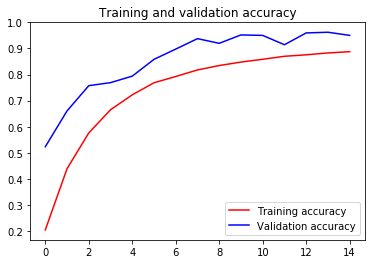

<Figure size 432x288 with 0 Axes>

In [20]:
# Plot the chart for accuracy and loss on both training and validation

import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

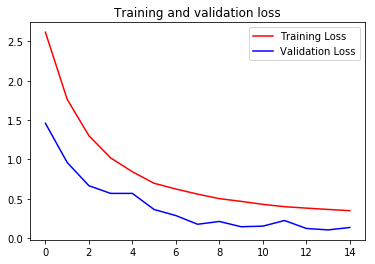

<Figure size 432x288 with 0 Axes>

In [21]:
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()

plt.show()